In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('OmniPower.csv')
df.head()

,Sales,Price,Promotion
0,4141,59,200
1,3842,59,200
2,3056,59,200
3,3519,59,200
4,4226,59,400


In [22]:
df.count()

Sales        34
Price        34
Promotion    34
dtype: int64

In [23]:
df.describe()

,Sales,Price,Promotion
count,34.000000,34.000000,34.000000
mean,3098.676471,77.823529,388.235294
std,1256.422018,16.286210,162.862102
min,675.000000,59.000000,200.000000
25%,2125.250000,59.000000,200.000000
50%,3430.500000,79.000000,400.000000
75%,3968.750000,99.000000,600.000000
max,5120.000000,99.000000,600.000000


In [63]:
df.corr(method='pearson')

,Sales,Price,Promotion
Sales,1.000000,-0.735146,0.535095
Price,-0.735146,1.000000,-0.096774
Promotion,0.535095,-0.096774,1.000000


Looks like Price has a strong, negative relationship with Sales, while Promotion has a strong, positive relationship with Sales.

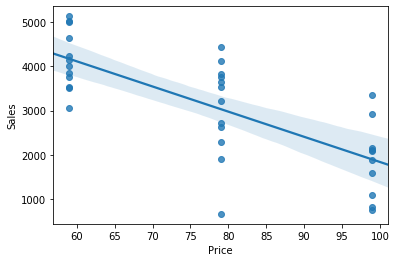

In [25]:
sns.regplot(x='Price', y = 'Sales', data = df)

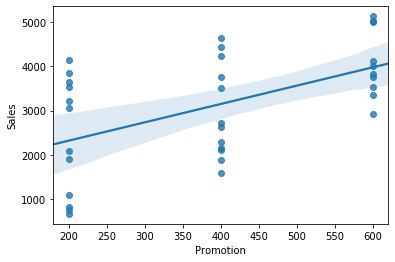

In [26]:
sns.regplot(x='Promotion', y = 'Sales', data = df)

Both Reg-plots concur with the above-mentioned findings.

## Model Training

In [27]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
X = df[['Price','Promotion']]
y = df.Sales

Wrote a Class LinRegModel to explore OOP with Python & Supervised Learning

In [30]:
class LinRegModel:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.random_state = 0
        self.r2 = 0.00
        self.X_train = []
        self.y_train = []
        self.X_test = []
        self.y_test = []
        self.y_hat = []
        self.model = LinearRegression()
        
    
    def split_sets(self, i):
        self.random_state = i
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=self.random_state)
    
    def train_model(self):
        self.model.fit(self.X_train, self.y_train)
    
    def get_y_hat(self):
        self.y_hat = self.model.predict(self.X_test)
        return self.y_hat
    
    def get_r2(self):
        self.r2 = r2_score(self.y_test, self.y_hat)
        return self.r2
    
    def everything(self, i):
        self.split_sets(i)
        self.train_model()
        self.get_y_hat()
        self.get_r2()

In [31]:
new_model = LinRegModel(X,y)

In [32]:
new_model.everything(0)

In [33]:
new_model.r2

0.8816955738854297

Let's say that we now want to find the most accurate model possible, given our dataset, and save that model. Perhaps we could try re-seeding the random_state of train_test_split?

In [34]:
import pickle
from joblib import dump, load

Let's use a list to store the accuracies of the models

In [35]:
r2List = []
r2 = 0

And we'll use functions to run the loop:

In [36]:
def Training(X,y, i):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    linReg = LinearRegression()
    linReg.fit(X_train, y_train)
    y_hat = linReg.predict(X_test)
    r2 = r2_score(y_test, y_hat)
    print("Random_state: {0} | r2_score: {1}".format(i, r2))
    return r2

In [37]:
def Training_Loop(X,y):
    for i in range(0,101):
        r2 = Training(X, y, i)
        r2List.append(r2)
    print("\n\nHighest found accuracy of {0} is found at random_state of {1}\n".format(max(r2List), r2List.index(max(r2List))))

For Training with the Best-performing random_state:

In [54]:
def Train_Best(X,y, i):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    linReg = LinearRegression()
    linReg.fit(X_train, y_train)
    y_hat = linReg.predict(X_test)
    r2 = r2_score(y_test, y_hat)
    print("Random_state: {0} | r2_score: {1}".format(i, r2))
    return linReg

We'll also time the entire process (Because my python.exe is running on a 1050Ti and I'm curious)

(Confession: I still can't figure out how to use Cuda yet)

In [39]:
from timeit import default_timer as timer

In [40]:
#Training Loop with Timer
start = timer()
Training_Loop(X, y)
dt = timer() - start
print("This loop took %f s" % dt)

Random_state: 0 | r2_score: 0.8816955738854297
Random_state: 1 | r2_score: 0.3143615412673306
Random_state: 2 | r2_score: 0.6680776357599827
Random_state: 3 | r2_score: 0.6924470263693848
Random_state: 4 | r2_score: -0.3913956556615201
Random_state: 5 | r2_score: 0.6801387956037874
Random_state: 6 | r2_score: 0.8308976886017426
Random_state: 7 | r2_score: 0.6635841939515162
Random_state: 8 | r2_score: 0.7945778471279848
Random_state: 9 | r2_score: 0.6186189025387596
Random_state: 10 | r2_score: 0.780856307572587
Random_state: 11 | r2_score: 0.5962112227220913
Random_state: 12 | r2_score: -0.34194903406989274
Random_state: 13 | r2_score: 0.2362828402330659
Random_state: 14 | r2_score: -0.19940320061263384
Random_state: 15 | r2_score: 0.5859533982972074
Random_state: 16 | r2_score: 0.7226920322981251
Random_state: 17 | r2_score: 0.8582459471107551
Random_state: 18 | r2_score: 0.5190084034071663
Random_state: 19 | r2_score: 0.6974029064158241
Random_state: 20 | r2_score: 0.644819433465625

In [55]:
best_Model = Train_Best(X, y, 72)

Random_state: 72 | r2_score: 0.9303280666187279


In [56]:
dump(best_Model, 'BestLinRegModel_OmniPower_rnd{0}.joblib'.format(r2List.index(max(r2List))))
print("Dumped linRegModel.")

Dumped linRegModel.


### Testing the Saved Model

In [46]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
import pickle
from joblib import load

In [57]:
loadedModel = load('BestLinRegModel_OmniPower_rnd72.joblib')

In [60]:
type(loadedModel)

sklearn.linear_model.base.LinearRegression

In [58]:
df = pd.read_csv('OmniPower.csv')
x = df[['Price','Promotion']]
y = df.Sales

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)

In [59]:
y_hat = loadedModel.predict(x_test)
print(y_test)
print(y_hat)

11    5015
9     5120
28    2114
30    2159
31    1602
6     3507
25     761
Name: Sales, dtype: int64
[4812.50406504 4812.50406504 2089.05284553 2089.05284553 2089.05284553
 4135.88211382 1412.43089431]


In [61]:
r2_score(y_test, y_hat)

0.9303280666187279

Ok so the model we saved is the model we intended to save. *YAY!*

Let's see on average how well this model would perform.

In [66]:
perfList = []

In [67]:
for i in range(0, 101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    y_hat = loadedModel.predict(x_test)
    perfList.append(r2_score(y_test, y_hat))

In [75]:
total_score = 0
for i in range(0,101):
    total_score += perfList[i]
average_score = total_score / 101
print("This model's average accuracy is {0}%.".format(round(average_score * 100, 3)))

This model's average accuracy is 66.829%.
